In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
data_path = 'https://raw.githubusercontent.com/ltdaovn/dataset/master/housing2.csv'

# Load dataset
data = pd.DataFrame(pd.read_csv(data_path))
print(data)
data.describe()

    Diện tích       Giá
0     30.0000   448.524
1     32.4138   509.248
2     34.8276   535.104
3     37.2414   551.432
4     39.6552   623.418
5     42.0690   625.992
6     44.4828   655.248
7     46.8966   701.377
8     49.3103   748.918
9     51.7241   757.881
10    54.1379   831.004
11    56.5517   855.409
12    58.9655   866.707
13    61.3793   902.545
14    63.7931   952.261
15    66.2069   995.531
16    68.6207  1069.780
17    71.0345  1074.420
18    73.4483  1103.880
19    75.8621  1138.690
20    78.2759  1153.130
21    80.6897  1240.270
22    83.1034  1251.900
23    85.5172  1287.970
24    87.9310  1320.470
25    90.3448  1374.920
26    92.7586  1410.160
27    95.1724  1469.690
28    97.5862  1478.540
29   100.0000  1515.280


,Diện tích,Giá
count,30.000000,30.000000
mean,65.000000,981.656633
std,21.249598,323.623977
min,30.000000,448.524000
25%,47.500025,713.262250
50%,65.000000,973.896000
75%,82.499975,1248.992500
max,100.000000,1515.280000


C:\Users\User\AppData\Local\Temp\ipykernel_17224\1005434491.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X, y, 'ro', color="blue")


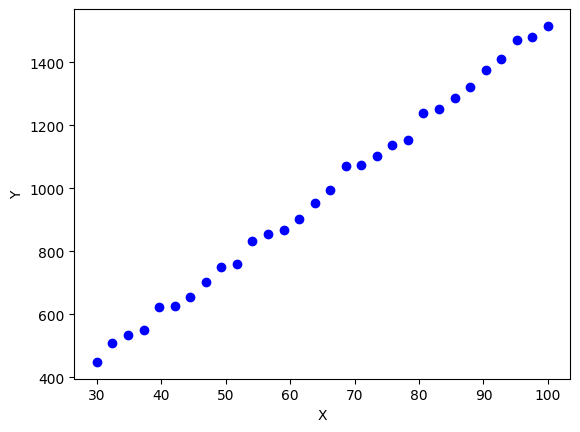

In [9]:
# Kiểm tra dữ liệu null
data.isnull().sum()*100/data.shape[0]

X = data[['Diện tích']]
y = data['Giá']
# print(y)

# Xây dựng biểu đồ
plt.plot(X, y, 'ro', color="blue")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# print(len(X_train))

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Tính độ chính xác của mô hình
y_pred = model.predict(X_test)

print("Coefficients: ", model.coef_)
print("Intercept: ", round(model.intercept_,4))
print("Giá =", round(model.intercept_,4), "+", round(model.coef_[0],4), "× Diện tích")

print("mean_squared_error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficients:  [15.12568802]
Intercept:  -0.4957
Giá = -0.4957 + 15.1257 × Diện tích
mean_squared_error:  15.923005664114537


In [22]:
y_problem = model.predict([[55.0]])

print(y_problem)

[831.41709534]


d:\Coding\CT312\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


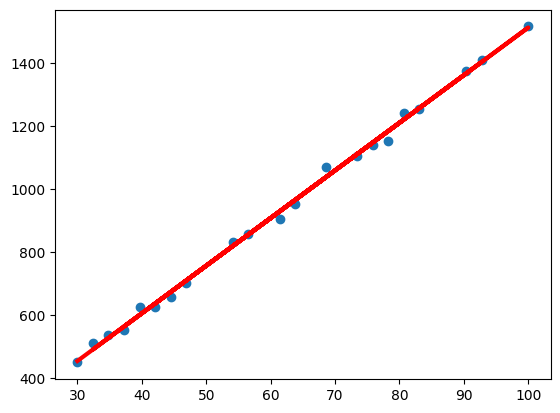

In [23]:
# Vẽ đường hồi quy trên tập dữ liệu huấn luyện
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red', linewidth=3)